In [4]:
import pandas as pd

from classes import *
import numpy as np
from pynwb import NWBHDF5IO

In [5]:
''' 
This is data from the mouse brain.
'''

# Now you can import the script directly
filepath = "/Users/michaelhofer/Documents/Uni/Mouse_data/mouse_10/sub-10_ses-mouse-10-session-date-2017-09-21-area-V1-L23-multi-plane-imaging_behavior+ophys.nwb"
# Open the file in read mode "r", and specify the driver as "ros3" for S3 files
io = NWBHDF5IO(filepath, mode="r", load_namespaces=True)

nwbfile = io.read()


/Users/michaelhofer/Documents/GitHub/NeuronVisualizer2.0/venv/lib/python3.11/site-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.6.0 because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/Users/michaelhofer/Documents/GitHub/NeuronVisualizer2.0/venv/lib/python3.11/site-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'hdmf-experimental' version 0.3.0 because version 0.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


In [6]:
# convert the first PlaneSegmentation into dataframe and examine the information
planeSeg_0_df = nwbfile.processing['ophys']['ImageSegmentation']['PlaneSegmentation_0'].to_dataframe()
planeSeg_0_df.head(5)


,ml,ap,depth,area,mTagBFP2,mScarlet,pixel_mask
id,,,,,,,
0,-2.71753,-3.21788,0.11,V1,False,False,"[[229, 76, 91947.16], [230, 76, 130799.37], [2..."
1,-2.76642,-3.16481,0.11,V1,False,False,"[[264, 113, 45804.51], [265, 113, 64200.27], [..."
2,-3.02527,-3.00245,0.11,V1,False,False,"[[443, 226, 84415.805], [444, 226, 89784.02], ..."
3,-2.91319,-3.04176,0.11,V1,True,False,"[[367, 200, 7744.4453], [362, 201, 7726.138], ..."
4,-2.56678,-2.80399,0.11,V1,False,False,"[[138, 389, 93532.75], [139, 389, 125248.22], ..."


In [7]:
# convert trial table into dataframe and examine it
'''
INFORMATION
The trial table contains basic information about trials, including:

start_time: start time of this trial from session onset in second
stop_time: stop time of this trial from session onset in second
is_vis: whether the trial was a visually guided trial
is_ruleA: whether the trial happened during rule A; rule A: BL & WR, rule B: WL & BR
is_switch: whether a rule switch happened on the trial
is_cueB: whether the trial had a black cue; True: black, False: white
is_choL: whether the mouse made a left choice on the trial; True: left, False: right
is_correct: whether the trial was correct

association_mat: behavioral LSTM predicted conditional probability; order: P(R|W), P(L|W), P(R|B), P(L|B)
rule_belief: the rule belief on the trial; directionality: positive: rule B, negative: rule A
signed_bias: the singed choice bias on the trial; directionality: positive: left bias, negative: right bias
rule_following: the rule-following on the trial; values between -0.5 ~ 0.5
bias_following: the bias-following on the trial; between -0.5 ~ 0.5
prob_actual_cho: the probability of actual choice on the trial, i.e. P(actual choice|actual cue)
Other information:

trial_onset_plane_frame_idx: for each imaging plane, the frame index for this trial's onset
trial_offset_plane_frame_idx: for each imaging plane, the frame index for this trial's offset
'''
trial_df = nwbfile.trials.to_dataframe()
trial_df.iloc[0:5]

,start_time,stop_time,is_vis,is_ruleA,is_switch,is_cueB,is_choL,is_correct,association_mat,rule_belief,signed_bias,rule_following,bias_following,prob_actual_cho,trial_onset_plane_frame_idx,trial_offset_plane_frame_idx
id,,,,,,,,,,,,,,,,
0,27.40725,38.93475,False,True,False,False,False,True,"[0.1915447860956192, 0.808455228805542, 0.1745...",0.017014,0.633925,0.008507,-0.316962,0.191545,"[95, 95, 95, 95, 94]","[132, 132, 132, 132, 132]"
1,38.95450,53.71500,True,True,False,False,False,True,"[0.4683721661567688, 0.5316278338432312, 0.381...",0.087143,0.150398,0.043571,-0.075199,0.468372,"[165, 164, 164, 164, 164]","[221, 221, 221, 220, 220]"
2,53.73325,67.30600,False,True,False,False,False,True,"[0.5884299874305725, 0.4115700125694275, 0.568...",0.020030,-0.156830,0.010015,0.078415,0.588430,"[253, 253, 253, 253, 252]","[302, 302, 302, 302, 302]"
3,67.32600,79.86375,False,True,False,False,False,True,"[0.6695836782455444, 0.3304162919521332, 0.633...",0.036280,-0.302887,0.018140,0.151444,0.669584,"[335, 334, 334, 334, 334]","[378, 378, 377, 377, 377]"
4,79.88150,93.72075,False,True,False,False,False,True,"[0.740466296672821, 0.25953370332717896, 0.670...",0.069668,-0.411264,0.034834,0.205632,0.740466,"[410, 410, 410, 409, 409]","[461, 461, 460, 460, 460]"


In [35]:
#print(nwbfile.processing['ophys']['deconvolved_activity_plane_0'])
bhv = nwbfile.processing['behavior']
different_data = list(bhv.data_interfaces.keys())

#print(bhv.data_interfaces['frame_aligned_position'].spatial_series)
t = np.asarray(bhv.data_interfaces['frame_aligned_position'].spatial_series['frame_aligned_forward_and_lateral_position'].data)
print(t[:50])
#for b in bhv:
#    print(b)



'''              X: Union[List[List[float]], np.ndarray],
                 B: Union[List[int], List[str], np.ndarray],
                 xlabs: Optional[Union[List[str], np.ndarray]] = None,
                 blabs: Optional[Union[List[str], np.ndarray]] = None,
                 fps: float = None
'''

[[nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]]


'              X: Union[List[List[float]], np.ndarray],\n                 B: Union[List[int], List[str], np.ndarray],\n                 xlabs: Optional[Union[List[str], np.ndarray]] = None,\n                 blabs: Optional[Union[List[str], np.ndarray]] = None,\n                 fps: float = None\n'

In [11]:
# extract data from deconvolved_activity_plane_0 and 
imaging_timestamps_0 = nwbfile.processing['ophys']['deconvolved_activity_plane_0'].timestamps
print(np.asarray(imaging_timestamps_0)[:15])

deconv_0 = nwbfile.processing['ophys']['deconvolved_activity_plane_0'].data[:]
df_0 = nwbfile.processing['ophys']['df_over_f_plane_0']['dF_over_F_plane_0'].data[:]
x = nwbfile.processing['ophys']['df_over_f_plane_0']['dF_over_F_plane_0']
print(type(x))
print(imaging_timestamps_0.shape, deconv_0.shape, df_0.shape)

print('\nChange in fluorescence (df/F) on plane 0 for each neuron (only 7 neurons & 3 timesteps shown)')
print(pd.DataFrame(df_0).iloc[:, 0:7].head(3))
print('\nDeconvolved neural activity (actual firing) on plane 0 for each neuron (only 7 neurons & 3 timesteps shown)')
print(pd.DataFrame(deconv_0).iloc[:, 0:7].head(3))
print('\nTimestamp of each recording (only 3 timesteps shown)')
print(pd.DataFrame(imaging_timestamps_0).head(3))


[11.7525 11.9195 12.086  12.253  12.4195 12.5865 12.753  12.92   13.0865
 13.2535 13.42   13.587  13.7535 13.9205 14.087 ]
<class 'pynwb.ophys.RoiResponseSeries'>
(37748,) (37748, 131) (37748, 131)

Change in fluorescence (df/F) on plane 0 for each neuron (only 7 neurons & 3 timesteps shown)
          0         1         2         3         4         5         6
0  5.507079  0.155855  3.353462  0.000000  0.175119  0.161585  0.152486
1  5.716812  0.262697  3.244025  0.064592  0.000000  0.106101  0.313019
2  6.299069  0.127754  3.052517  0.237151  0.031268  0.016284  0.185410

Deconvolved neural activity (actual firing) on plane 0 for each neuron (only 7 neurons & 3 timesteps shown)
          0    1         2    3    4    5    6
0  0.000000  0.0  0.000000  0.0  0.0  0.0  0.0
1  0.858316  0.0  0.322156  0.0  0.0  0.0  0.0
2  1.257271  0.0  0.224131  0.0  0.0  0.0  0.0

Timestamp of each recording (only 3 timesteps shown)
         0
0  11.7525
1  11.9195
2  12.0860


FIRST 1000 TIMESTEPS RECORDED FOR THE FIRST 7 NEURONS
Trials with wrong choices are orange while correct choices are blue.
Green horizontal lines signal the start of trial and red lines the end.


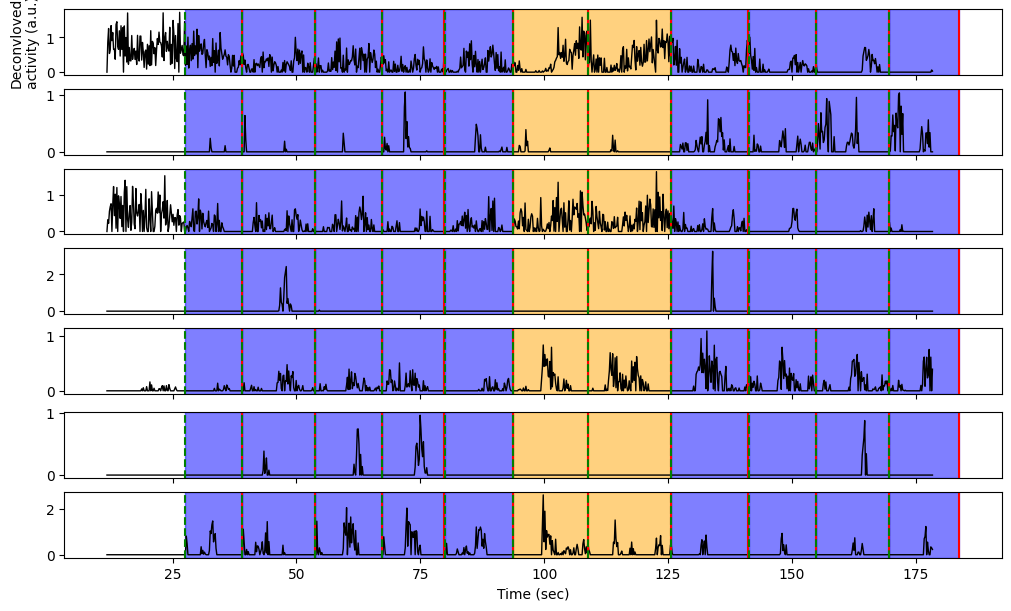

In [10]:
# plot of the deconvloved activity for the first 7 neurons until timestep 250
t_start = 0
t_end = 1000
f, ax = plt.subplots(7 , 1, figsize=(10, 6), constrained_layout=True)

for i_neuron in range(7):
    ax[i_neuron].plot(imaging_timestamps_0[t_start:t_end],deconv_0[t_start:t_end,i_neuron],'k',lw=1)
    if i_neuron == 6:
        ax[i_neuron].set(xlabel='Time (sec)')
    else:
        ax[i_neuron].set(xticklabels=[])
    if i_neuron == 0:
        ax[i_neuron].set(ylabel=f'Deconvloved\nactivity (a.u.)')
        
for index, row in trial_df.iterrows():
    starttime = row['start_time']  
    stoptime = row['stop_time'] 
    correct = row['is_correct'] 
    
    max_trial = imaging_timestamps_0[t_end]
    
    if starttime > max_trial:
        break
        
    for idx in range(7):
        ax[idx].axvline(x=starttime, color='green', linestyle='dashed')
        ax[idx].axvline(x=stoptime, color='red', linestyle='solid')
        if correct:
            ax[idx].axvspan(starttime, stoptime, color='blue', alpha=0.5)
        else:
            ax[idx].axvspan(starttime, stoptime, color='orange', alpha=0.5)
            
print('FIRST 1000 TIMESTEPS RECORDED FOR THE FIRST 7 NEURONS\nTrials with wrong choices are orange while correct choices are blue.\nGreen horizontal lines signal the start of trial and red lines the end.')
